In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


**Importing Liabraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer, StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

**Loading Data**

In [3]:
train_df=pd.read_csv( "/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_df=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

In [4]:
train_df.head(n=10).T

,0,1,2,3,4,5,6,7,8,9
last contact date,2009-04-17,2009-10-11,2010-11-20,2009-09-01,2008-01-29,2009-05-07,2009-05-15,2010-05-08,2008-12-13,2010-05-21
age,26,52,44,33,31,25,46,37,38,31
job,blue-collar,technician,blue-collar,admin.,entrepreneur,entrepreneur,blue-collar,admin.,unemployed,technician
marital,married,married,married,married,single,single,married,married,divorced,married
education,secondary,secondary,secondary,secondary,tertiary,tertiary,secondary,secondary,primary,secondary
default,no,no,no,no,no,no,no,no,yes,no
balance,647,553,1397,394,137,140,668,14,14123,589
housing,yes,yes,no,yes,no,yes,yes,yes,yes,yes
loan,no,no,no,no,no,no,no,no,yes,yes
contact,cellular,telephone,cellular,telephone,cellular,cellular,NaN,NaN,cellular,NaN


In [5]:
train_df.shape

(39211, 16)

In [6]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
last contact date,39211,1013,2009-05-15,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,39211.0,NaN,NaN,NaN,42.120247,12.709352,18.0,33.0,40.0,50.0,95.0
job,38982,11,blue-collar,7776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,39211,3,married,22691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,37744,3,secondary,19584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,39211,2,no,36954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,39211.0,NaN,NaN,NaN,5441.781719,16365.292065,-8019.0,98.0,549.0,2030.0,102127.0
housing,39211,2,yes,21657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,39211,2,no,31820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,28875,2,cellular,25030,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [8]:
train_df.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [9]:
test_df.isna().sum()

last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64

what is the sucess of telemarketing team to sell a term loan

In [10]:
train_df['target']=np.where(train_df['target'].isin(['yes']),1,0)

In [11]:
train_df['target'].mean() #event rate(out of 100 calls that are made 14 take the the term loan)

0.14860625844788453

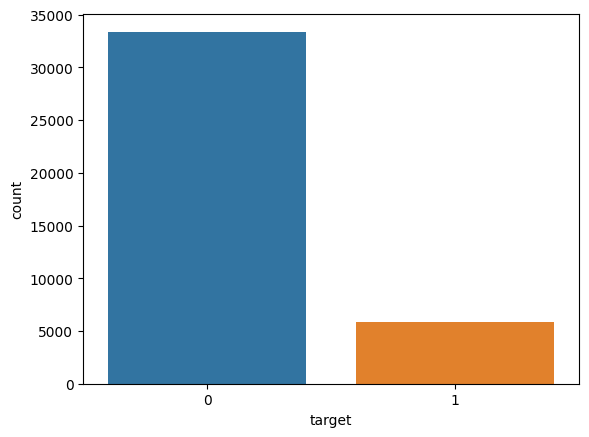

In [12]:
sns.countplot(x='target',data=train_df)
plt.show()

In [13]:
train_df['education'].value_counts()

education
secondary    19584
tertiary     11615
primary       6545
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='target'>

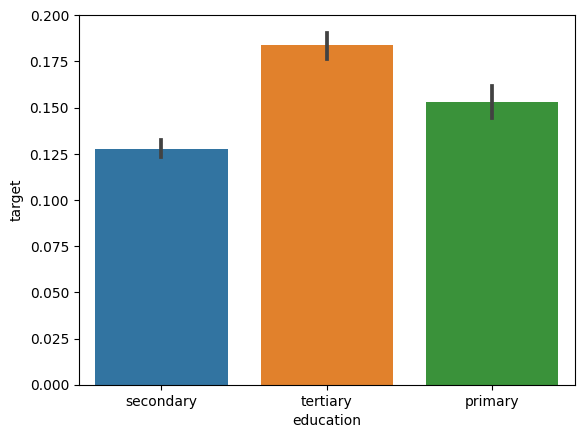

In [14]:
from numpy import mean
sns.barplot(x='education',y='target',data=train_df,estimator=mean)

In [15]:
train_df.groupby('education')['target'].mean()

education
primary      0.152788
secondary    0.127604
tertiary     0.183642
Name: target, dtype: float64

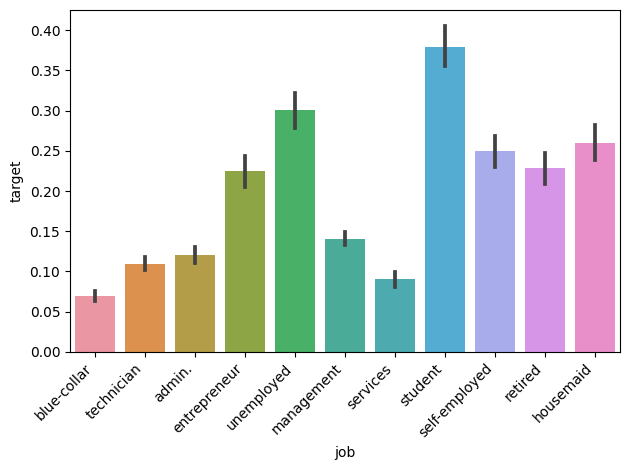

In [16]:

sns.barplot(x='job',y='target',data=train_df,estimator=mean,)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [17]:
train_df.groupby('job')['target'].mean()

job
admin.           0.120019
blue-collar      0.069444
entrepreneur     0.224931
housemaid        0.260266
management       0.140713
retired          0.228070
self-employed    0.249194
services         0.090226
student          0.379038
technician       0.109905
unemployed       0.300297
Name: target, dtype: float64

<Axes: xlabel='marital', ylabel='target'>

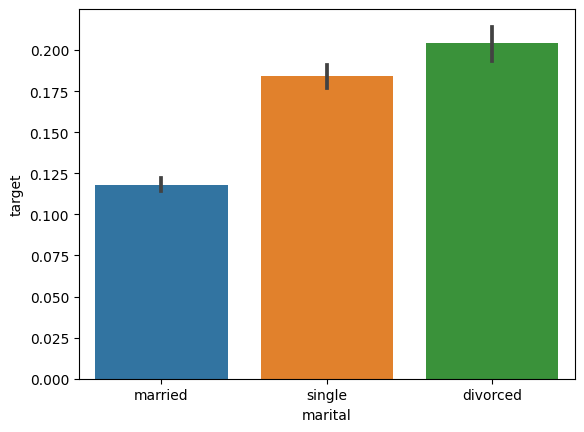

In [18]:

sns.barplot(x='marital',y='target',data=train_df,estimator=mean)

In [19]:
train_df.groupby('marital')['target'].mean()

marital
divorced    0.204175
married     0.118153
single      0.184000
Name: target, dtype: float64

<Axes: xlabel='default', ylabel='target'>

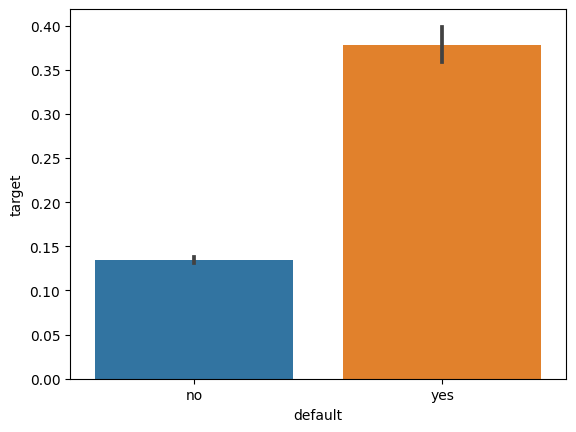

In [20]:
sns.barplot(x='default',y='target',data=train_df,estimator=mean)

In [21]:
train_df.groupby('default')['target'].mean()

default
no     0.134600
yes    0.377935
Name: target, dtype: float64

<Axes: xlabel='housing', ylabel='target'>

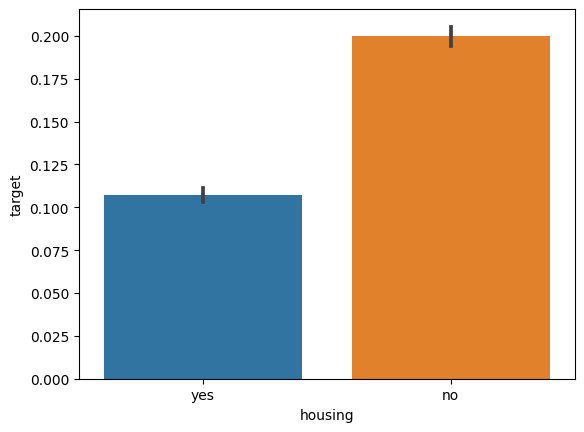

In [22]:
sns.barplot(x='housing',y='target',data=train_df,estimator=mean,)

In [23]:
train_df.groupby('housing')['target'].mean()

housing
no     0.199670
yes    0.107217
Name: target, dtype: float64

<Axes: xlabel='loan', ylabel='target'>

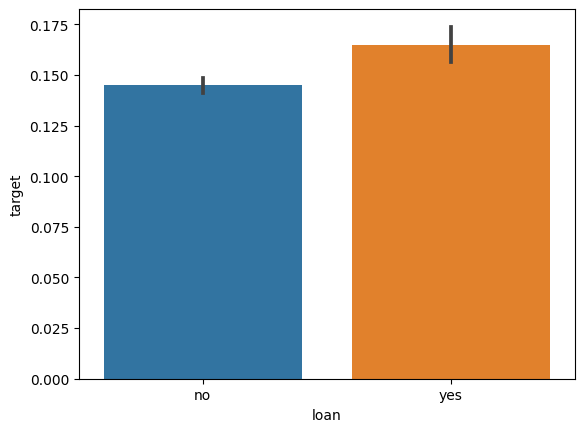

In [24]:
sns.barplot(x='loan',y='target',data=train_df,estimator=mean)

In [25]:
train_df.groupby('loan')['target'].mean()

loan
no     0.144846
yes    0.164795
Name: target, dtype: float64

<Axes: xlabel='contact', ylabel='target'>

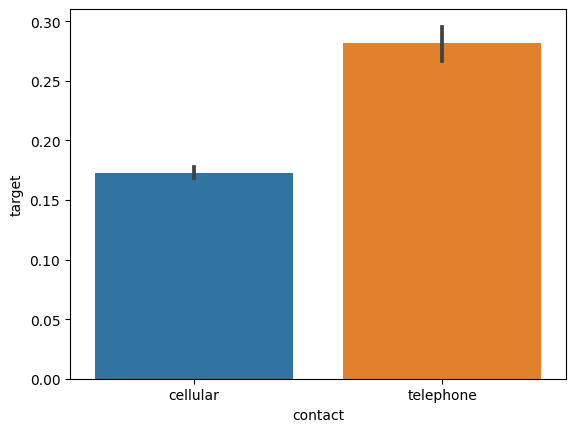

In [26]:
sns.barplot(x='contact',y='target',data=train_df,estimator=mean)

In [27]:
train_df.groupby('contact')['target'].mean()

contact
cellular     0.172913
telephone    0.281404
Name: target, dtype: float64

<Axes: xlabel='poutcome', ylabel='target'>

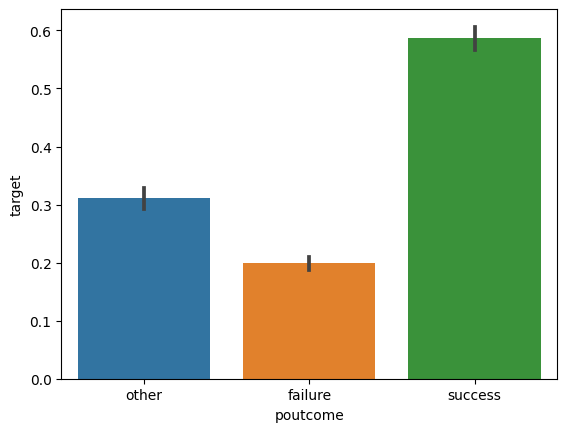

In [28]:
sns.barplot(x='poutcome',y='target',data=train_df,estimator=mean)

In [29]:
train_df.groupby('poutcome')['target'].mean()

poutcome
failure    0.198828
other      0.310547
success    0.586406
Name: target, dtype: float64

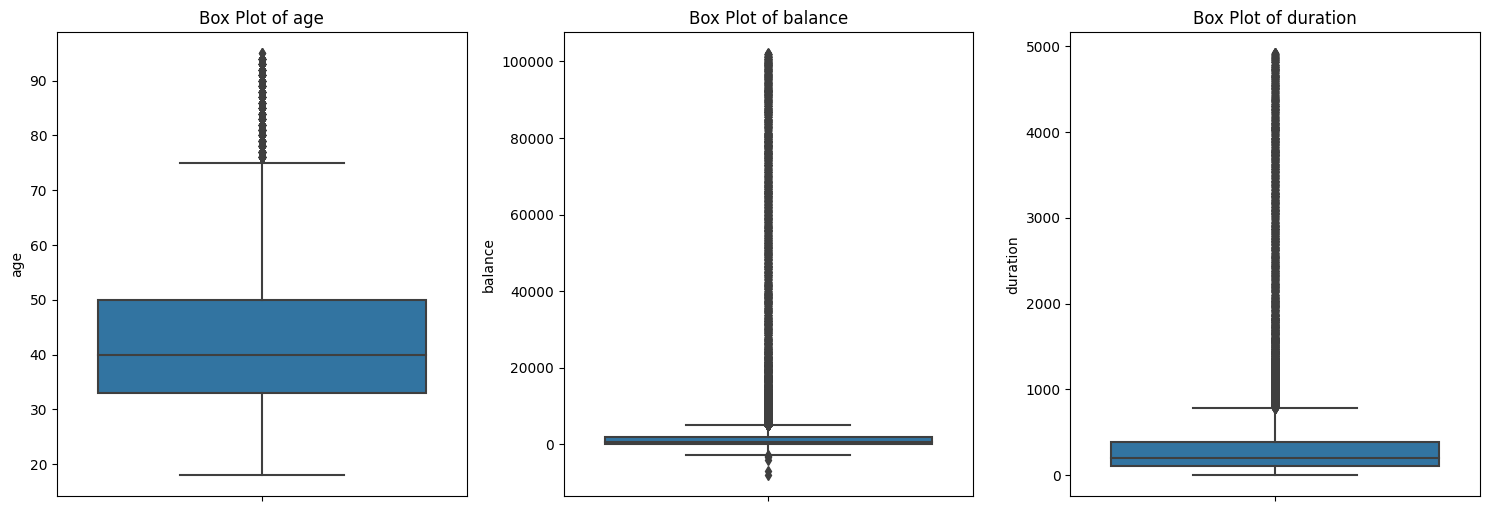

In [30]:
numeric_columns = ['age', 'balance', 'duration']


plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(y=train_df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [31]:
cat_cols=train_df.select_dtypes(include='object').columns
cat_cols

Index(['last contact date', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'poutcome'],
      dtype='object')

In [32]:
num_cols=train_df.select_dtypes(exclude='object').columns
num_cols

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'target'],
      dtype='object')

In [33]:
train_df[num_cols].describe()

,age,balance,duration,campaign,pdays,previous,target
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171,0.148606
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259,0.355704
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [34]:
X = train_df.drop(columns=['target'])
y = train_df['target']

In [35]:
def feature_engineering(X):
    X = X.copy()
    if 'last contact date' in X.columns:
        X['last contact date'] = pd.to_datetime(X['last contact date'], errors='coerce')
        
        # Extract month names and day of the week
        X['contact_month'] = X['last contact date'].dt.month_name().fillna('Unknown')
        X['contact_dayofweek'] = X['last contact date'].dt.dayofweek.fillna(-1).astype(int)
        X.drop(columns=['last contact date'], inplace=True)

        
        
        if 'balance' in X.columns:
            X['balance'] = X['balance'].replace([np.inf, -np.inf], np.nan).fillna(0)
            X['balance'] = X['balance'].clip(lower=0)
        if 'duration' in X.columns:
            X['duration'] = X['duration'].replace([np.inf, -np.inf], np.nan).fillna(0)
            X['duration'] = X['duration'].clip(lower=0)  
        if 'balance' in X.columns and 'duration' in X.columns:
            X['balance_duration_ratio'] = X['balance'] / (X['duration'] + 1)
        
    return X


In [36]:
feature_engineer = FunctionTransformer(feature_engineering)
X = feature_engineer.transform(X)
test_df = feature_engineer.transform(test_df)

<Axes: >

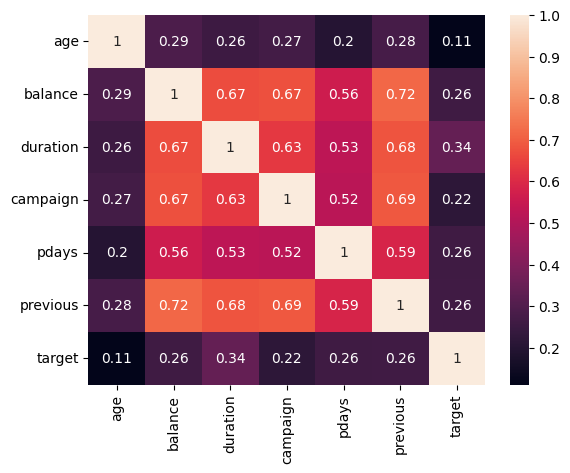

In [37]:
cor=train_df[num_cols].corr()
sns.heatmap(cor,annot=True)

In [38]:
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [39]:
label_encoder_cols = [col for col in cat_cols if X[col].nunique() <= 5]  # Label Encode small cardinality
one_hot_encoder_cols = [col for col in cat_cols if col not in label_encoder_cols]  # One-Hot Encode others


In [40]:
label_encoders = {}
for col in label_encoder_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))
    label_encoders[col] = le

In [41]:
num_cols=X.select_dtypes(include=['int64','float64']).columns.to_list()
num_cols

['age',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'contact_dayofweek',
 'balance_duration_ratio']

In [42]:
cat_cols_with_na = [col for col in cat_cols if X[col].isnull().any()]
for col in cat_cols_with_na:
     X[col].fillna('Unknown', inplace=True)

# # Same for test_data to ensure consistency
for col in cat_cols_with_na:
    test_df[col].fillna('Unknown', inplace=True)

/tmp/ipykernel_17/3724211843.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna('Unknown', inplace=True)
/tmp/ipykernel_17/3724211843.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [43]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())  # Apply MinMaxScaler for normalization
])


In [44]:
one_hot_transformer = OneHotEncoder(handle_unknown='ignore')


In [45]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('onehot', one_hot_transformer, one_hot_encoder_cols)
    ],
    remainder='passthrough'  # Keep label-encoded columns
)

In [46]:

x_processed = preprocessor.fit_transform(X)

x_test_processed = preprocessor.transform(test_df)


In [47]:
X.isna().sum()

age                       0
job                       0
marital                   0
education                 0
default                   0
balance                   0
housing                   0
loan                      0
contact                   0
duration                  0
campaign                  0
pdays                     0
previous                  0
poutcome                  0
contact_month             0
contact_dayofweek         0
balance_duration_ratio    0
dtype: int64

In [48]:
x_train, x_val, y_train, y_val = train_test_split(x_processed, y, test_size=0.2, random_state=42)

In [49]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
y_val_pred_dummy = dummy_clf.predict(x_val)
dummy_f1 = f1_score(y_val, y_val_pred_dummy, average='macro')
print(f"Dummy Classifier Validation F1 Score (Macro): {dummy_f1}")


Dummy Classifier Validation F1 Score (Macro): 0.45865543898398675


In [50]:
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "NaiveBayes": GaussianNB(),
    'Logistic'  : LogisticRegression()
}

In [51]:
model_f1_scores = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    val_preds = model.predict(x_val)
    f1 = f1_score(y_val, val_preds, average='macro')
    model_f1_scores[model_name] = f1
    print(f'{model_name} F1 Score: {f1}')

RandomForest F1 Score: 0.7160053148129398
XGBoost F1 Score: 0.7240877977747655
KNN F1 Score: 0.6638851310241602
SVM F1 Score: 0.675027202440124
NaiveBayes F1 Score: 0.6809527265871235
Logistic F1 Score: 0.6105231119719086


In [52]:
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=30, step=1)
X_train_selected = rfe_selector.fit_transform(x_train, y_train)
X_val_selected = rfe_selector.transform(x_val)
test_selected = rfe_selector.transform(x_test_processed)

In [53]:
rf_param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None],
    'max_features': ['sqrt', 'log2', None]
}

rf_model = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=20, cv=3, scoring='f1_macro', random_state=42, n_jobs=-1)
rf_search.fit(X_train_selected, y_train)
best_rf = rf_search.best_estimator_

In [54]:
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_search = RandomizedSearchCV(xgb_model, xgb_param_dist, n_iter=20, cv=3, scoring='f1_macro', random_state=42, n_jobs=-1)
xgb_search.fit(X_train_selected, y_train)
best_xgb = xgb_search.best_estimator_

In [55]:
gb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}
gb_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), gb_param_dist, n_iter=20, cv=3, scoring='f1_macro', n_jobs=-1)
gb_search.fit(X_train_selected, y_train)
best_gb = gb_search.best_estimator_


In [56]:
voting_clf = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    voting='soft'
)
voting_clf.fit(x_train, y_train)

# Evaluate the ensemble model
y_val_preds = voting_clf.predict(x_val)
val_f1 = f1_score(y_val, y_val_preds, average='macro')
print(f"Voting Classifier Validation F1 Macro Score: {val_f1}")

Voting Classifier Validation F1 Macro Score: 0.769566291263585


In [57]:
y_val_rf = best_rf.predict(X_val_selected)
rf_f1 = f1_score(y_val, y_val_rf, average='macro')

y_val_xgb = best_xgb.predict(X_val_selected)
xgb_f1 = f1_score(y_val, y_val_xgb, average='macro')
y_val_gb = best_gb.predict(X_val_selected)
gb_f1 = f1_score(y_val, y_val_gb, average='macro')


In [58]:
f1_scores = {'Random Forest': rf_f1, 'XGBoost': xgb_f1,'Gradientboost':gb_f1}
best_model_name = max(f1_scores, key=f1_scores.get)
best_model = {'Random Forest': best_rf, 'XGBoost': best_xgb,'Gradientboost':best_gb}[best_model_name]

print(f"Random Forest F1 Macro Score: {rf_f1}")
print(f"XGBoost F1 Macro Score: {xgb_f1}")
print(f"Gradientboost F1 Macro Score: {gb_f1}")


print(f"Best Model: {best_model_name}")

# Predict on the test set
test_preds = voting_clf.predict(x_test_processed)
submission = pd.DataFrame({'id': range(len(test_df)), 'target': test_preds})
submission['target'] = submission['target'].map({1: 'yes', 0: 'no'})
submission.to_csv('submission.csv', index=False)
print("Submission file created.")

Random Forest F1 Macro Score: 0.7710636364556913
XGBoost F1 Macro Score: 0.7299638748444554
Gradientboost F1 Macro Score: 0.7243979167022491
Best Model: Random Forest
Submission file created.
